In [1]:
import sys
import tqdm
import math

import torch
import torch.nn as nn
import torch.nn.functional as F
import gpytorch
import matplotlib.pyplot as plt

from torch_ssge import SSGE

In [2]:
dist = torch.distributions.multivariate_normal.MultivariateNormal(
    torch.zeros(10),
    torch.eye(10),
)

In [3]:
kernel = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.MaternKernel(
        ard_num_dims = 10
    )
)

In [4]:
estimator = SSGE(
    gpytorch.kernels.ScaleKernel(
        gpytorch.kernels.MaternKernel(
            ard_num_dims = 10
        )
    )
)

In [5]:
sample = dist.sample([100])
sample.requires_grad_(True)
estimator.fit(sample)

In [7]:
test_sample = dist.sample([100])
test_sample.requires_grad_(True)
estimator(test_sample).shape

torch.Size([100, 10])

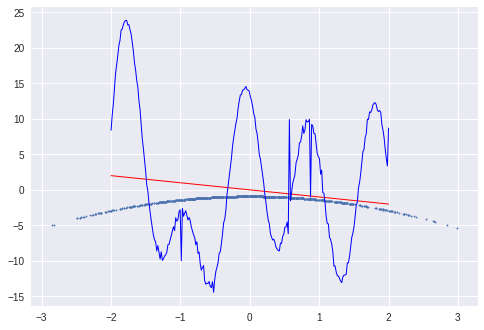

In [4]:
def test_gaussian():
    plt.style.use('seaborn')

    dist = torch.distributions.normal.Normal(
        torch.tensor(0.0), torch.tensor(1.0)
    )

    kernel = gpytorch.kernels.RBFKernel()

    # estimator = SSGE(gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel()))
    estimator = SSGE(
        gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel()), 
        noise=1e-4
    )

    sample = dist.sample((1000, 1))
    logp = dist.log_prob(sample)
    sample.requires_grad_(True)
    estimator.fit(sample)

    # test_points = dist.sample((25, 1))
    test_points = torch.linspace(-2, +2, 250)
    test_points.requires_grad_(True)
    grad_the = -test_points
    grad_est = estimator(test_points)

    # Plot results
    fig, ax = plt.subplots(1, 1)
    ax.scatter(sample.detach().numpy(), logp.detach().numpy(),
               marker='o', s=2.0, label='Sample points')
    ax.plot(test_points.detach().numpy(), grad_the.detach().numpy(),
            c='red', lw=1, label=r"$\nabla_x")
    ax.plot(test_points.detach().numpy(), grad_est.detach().numpy(),
            c='blue', lw=1,  label=r"$\hat{\nabla_x}")
    #plt.savefig("out/test_gaussian.png")

test_gaussian()

In [8]:
def test_gaussian():
    plt.style.use('seaborn')

    dist = torch.distributions.normal.Normal(
        torch.tensor(0.0), torch.tensor(1.0)
    )

    kernel = gpytorch.kernels.RBFKernel()

    # estimator = SSGE(gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel()))
    estimator = SSGE(
        gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel()), 
        noise=1e-4
    )

    sample = dist.sample((1000, 1))
    logp = dist.log_prob(sample)
    sample.requires_grad_(True)
    
    optimizer = torch.optim.Adam(kernel.parameters(), lr = 3e-4)
    num_epoch = 100
    for epoch in range(num_epoch):
        optimizer.zero_grad()
        estimator.fit(sample)
        dist.log_prob(sample).sum().backward(retain_graph=True)
        (estimator(sample) - sample.grad).pow(2).sum().backward()
        optimizer.step()

    # test_points = dist.sample((25, 1))
    test_points = torch.linspace(-2, +2, 250)
    test_points.requires_grad_(True)
    grad_the = -test_points
    grad_est = estimator(test_points)

    # Plot results
    fig, ax = plt.subplots(1, 1)
    ax.scatter(sample.detach().numpy(), logp.detach().numpy(),
               marker='o', s=2.0, label='Sample points')
    ax.plot(test_points.detach().numpy(), grad_the.detach().numpy(),
            c='red', lw=1, label=r"$\nabla_x")
    ax.plot(test_points.detach().numpy(), grad_est.detach().numpy(),
            c='blue', lw=1,  label=r"$\hat{\nabla_x}")
    #plt.savefig("out/test_gaussian.png")

test_gaussian()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn